In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import glob
import os
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [12]:
df = pd.read_csv('/content/BBC News Train.csv')
df.head(2)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business


In [48]:
df.isna().sum()

Category     0
ArticleId    0
Text         0
dtype: int64

In [47]:
df.describe()

,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


In [13]:
df['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

<Axes: xlabel='Category'>

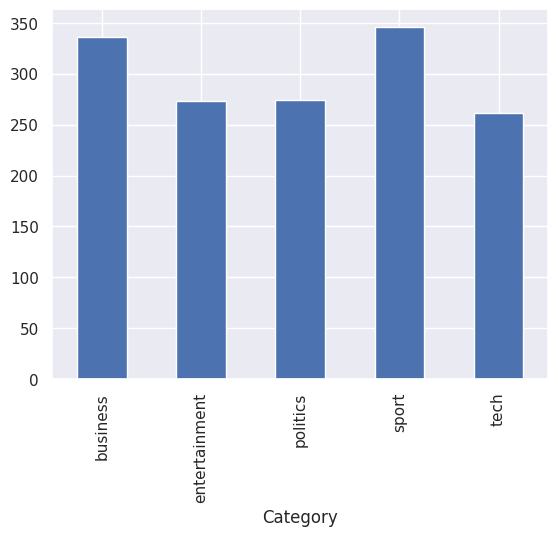

In [45]:
df.groupby('Category').Category.count().plot.bar(ylim=0)

In [14]:
tags_values = df['Category'].value_counts()
tags_values

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [15]:
df.columns
df['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [16]:
df = pd.DataFrame(df, columns=['Category', 'ArticleId', 'Text'])
print(df.head())
print('\nShape of data is {}\n'.format(df.shape))
print(df.info())

   Category  ArticleId                                               Text
0  business       1833  worldcom ex-boss launches defence lawyers defe...
1  business        154  german business confidence slides german busin...
2  business       1101  bbc poll indicates economic gloom citizens in ...
3      tech       1976  lifestyle  governs mobile choice  faster  bett...
4  business        917  enron bosses in $168m payout eighteen former e...

Shape of data is (1490, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   1490 non-null   object
 1   ArticleId  1490 non-null   int64 
 2   Text       1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None


In [21]:
heading_sport = df[df["Category"] == "sport"]["Text"]
collapsed_heading_sport = heading_sport.str.cat(sep=' ')
heading_business = df[df["Category"] == "business"]["Text"]
collapsed_heading_business = heading_business.str.cat(sep=' ')
heading_politics = df[df["Category"] == "politics"]["Text"]
collapsed_heading_politics = heading_politics.str.cat(sep=' ')
heading_tech = df[df["Category"] == "tech"]["Text"]
collapsed_heading_tech = heading_tech.str.cat(sep=' ')
heading_entertainment = df[df["Category"] == "entertainment"]["Text"]
collapsed_heading_entertainment = heading_entertainment.str.cat(sep=' ')

In [22]:
clf =  Pipeline([('vect', CountVectorizer()),
             ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
                ])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Category'], test_size = 0.4,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((894,), (596,), (894,), (596,))

In [24]:
model = clf.fit(X_train,y_train)

In [25]:
print("Accuracy of Naive Bayes Classifier is {}".format(model.score(X_test,y_test)))

Accuracy of Naive Bayes Classifier is 0.9328859060402684


In [26]:
y_predicted = model.predict(X_test)
y_predicted[0:10]

array(['business', 'politics', 'politics', 'politics', 'sport',
       'business', 'tech', 'entertainment', 'business', 'tech'],
      dtype='<U13')

In [27]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[133,   0,   2,   0,   2],
       [  2,  94,   1,  11,   1],
       [  2,   0, 103,   4,   0],
       [  0,   0,   0, 129,   0],
       [  3,   0,   6,   6,  97]])

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[133   0   2   0   2]
 [  2  94   1  11   1]
 [  2   0 103   4   0]
 [  0   0   0 129   0]
 [  3   0   6   6  97]]
Normalized confusion matrix
[[0.97 0.   0.01 0.   0.01]
 [0.02 0.86 0.01 0.1  0.01]
 [0.02 0.   0.94 0.04 0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.03 0.   0.05 0.05 0.87]]


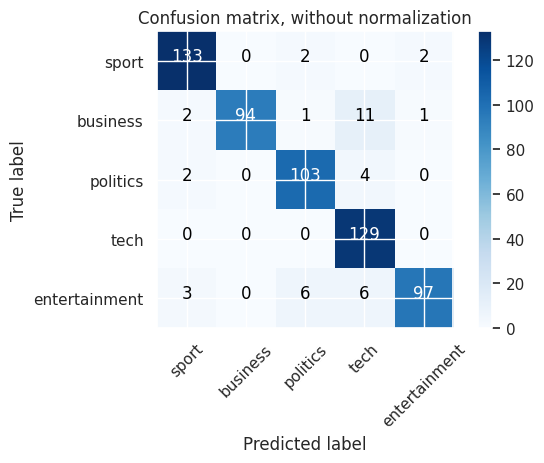

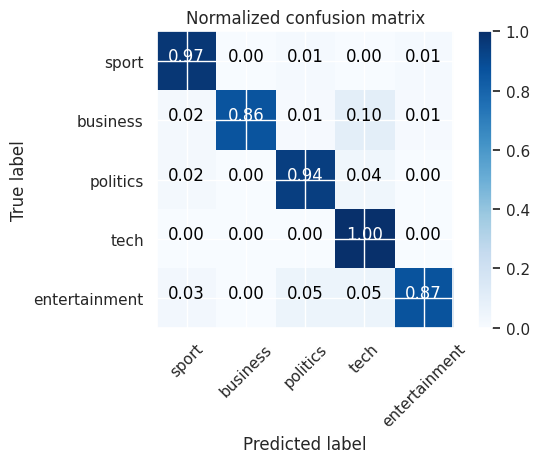

In [31]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['sport','business','politics','tech','entertainment'],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ['sport','business','politics','tech','entertainment'], normalize=True,title='Normalized confusion matrix')

plt.show()

In [32]:
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', DecisionTreeClassifier()),
    ])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Category"],random_state = 42, test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1192,), (298,), (1192,), (298,))

In [34]:
model = clf.fit(X_train,y_train)

In [35]:
print("Accuracy of decision Classifier is {}".format(model.score(X_test,y_test)))

Accuracy of decision Classifier is 0.8355704697986577


In [36]:
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Category"],random_state = 42, test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((1192,), (298,), (1192,))

In [38]:
model = clf.fit(X_train,y_train)

In [39]:
print("Accuracy of RandomForest Classifier is {}".format(model.score(X_test,y_test)))


Accuracy of RandomForest Classifier is 0.9765100671140939


In [40]:
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression()),
    ])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Category"],random_state = 42,test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((1192,), (298,), (1192,))

In [42]:
model = clf.fit(X_train,y_train)

In [43]:
print("Accuracy of  LogisticRegression {}".format(model.score(X_test,y_test)))

Accuracy of  LogisticRegression 0.9664429530201343


# Now Classification using Neural network

In [49]:
import re
import nltk
from tensorflow import keras
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split

In [50]:
nltk.download("stopwords", quiet = True)
nltk.download("wordnet", quiet = True)
nltk.download("punkt", quiet = True)
lemmatizer = WordNetLemmatizer()
english_stopwords = set(nltk.corpus.stopwords.words('english'))

In [51]:
df.head()

,Category,ArticleId,Text
0,business,1833,worldcom ex-boss launches defence lawyers defe...
1,business,154,german business confidence slides german busin...
2,business,1101,bbc poll indicates economic gloom citizens in ...
3,tech,1976,lifestyle governs mobile choice faster bett...
4,business,917,enron bosses in $168m payout eighteen former e...


In [52]:
def preprocess(review):
    Text = re.sub('<.*?>', '', review.lower().strip())
    Text = re.sub('[^\w\s]', ' ', Text)

    result = ''
    tokens = nltk.word_tokenize(Text)
    for t in tokens:
        lemma = lemmatizer.lemmatize(t)
        if lemma not in english_stopwords:
            result += lemma + ' '

    return result


In [54]:
df['Text'] = df['Text'].apply(lambda x : preprocess(x))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Category'], test_size=0.2, random_state=42, shuffle=True)

In [56]:
NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

In [57]:
def fit_tokenizer(train_sentences, num_words, oov_token):
    tokenizer = keras.preprocessing.text.Tokenizer(num_words, oov_token=oov_token)
    tokenizer.fit_on_texts(train_sentences)
    return tokenizer

In [58]:
tokenizer = fit_tokenizer(X_train, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index
print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 20117 words

<OOV> token included in vocabulary


In [59]:
def seq_and_pad(sentences, tokenizer, padding, maxlen):

    sequences = tokenizer.texts_to_sequences(sentences)
    padded_sequences = keras.preprocessing.sequence.pad_sequences(sequences, padding=padding, maxlen=maxlen)
    print(padded_sequences)
    return padded_sequences

In [60]:
train_padded_seq = seq_and_pad(X_train, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(X_test, tokenizer, PADDING, MAXLEN)
print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

[[619  15  14 ...   1   1 652]
 [895   3   1 ...   1   1   1]
 [  1   1   1 ...  90 630  90]
 ...
 [ 28 345   1 ...  52   5   1]
 [440   1   1 ... 603   1 168]
 [  1   1   1 ...   1   4   1]]
[[  1   1   1 ...   1 197   1]
 [  1 226  59 ...   6   1 349]
 [  1   1   2 ...   1 117 766]
 ...
 [  1   1 951 ... 270   1  27]
 [  4 955   1 ...   1   1   1]
 [  1   1  98 ...   1 983   1]]
Padded training sequences have shape: (1192, 120)

Padded validation sequences have shape: (298, 120)


In [61]:
def tokenize_labels(all_labels, split_labels):
    label_tokenizer = keras.preprocessing.text.Tokenizer()
    label_tokenizer.fit_on_texts(all_labels)
    label_seq = label_tokenizer.texts_to_sequences(split_labels)
    label_seq_np = np.array(label_seq)-1
    return label_seq_np

In [63]:
train_label_seq = tokenize_labels(df['Category'], y_train)
val_label_seq = tokenize_labels(df['Category'], y_test)

print(f"First 5 labels of the training set should look like this:\n{train_label_seq[:5]}\n")
print(f"First 5 labels of the validation set should look like this:\n{val_label_seq[:5]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}\n")

First 5 labels of the training set should look like this:
[[0]
 [1]
 [2]
 [0]
 [2]]

First 5 labels of the validation set should look like this:
[[3]
 [2]
 [2]
 [4]
 [4]]

Tokenized labels of the training set have shape: (1192, 1)

Tokenized labels of the validation set have shape: (298, 1)



In [64]:
def build_model(num_words,embedding_dim,maxlen):

    model = keras.Sequential([
        keras.layers.Embedding(input_dim=num_words, output_dim = embedding_dim, input_length=maxlen),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(5, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [65]:
model = build_model(NUM_WORDS, EMBEDDING_DIM, MAXLEN)

history = model.fit(train_padded_seq, train_label_seq, epochs=30, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/30
38/38 [==============================] - 1s 9ms/step - loss: 1.6045 - accuracy: 0.2483 - val_loss: 1.5976 - val_accuracy: 0.2114
Epoch 2/30
38/38 [==============================] - 0s 4ms/step - loss: 1.5828 - accuracy: 0.2685 - val_loss: 1.5660 - val_accuracy: 0.3456
Epoch 3/30
38/38 [==============================] - 0s 4ms/step - loss: 1.5356 - accuracy: 0.4052 - val_loss: 1.5060 - val_accuracy: 0.4027
Epoch 4/30
38/38 [==============================] - 0s 4ms/step - loss: 1.4552 - accuracy: 0.4505 - val_loss: 1.4134 - val_accuracy: 0.4362
Epoch 5/30
38/38 [==============================] - 0s 4ms/step - loss: 1.3406 - accuracy: 0.4706 - val_loss: 1.2854 - val_accuracy: 0.5436
Epoch 6/30
38/38 [==============================] - 0s 4ms/step - loss: 1.2052 - accuracy: 0.5629 - val_loss: 1.1512 - val_accuracy: 0.6309
Epoch 7/30
38/38 [==============================] - 0s 4ms/step - loss: 1.0658 - accuracy: 0.6871 - val_loss: 1.0226 - val_accuracy: 0.7114
Epoch 8/30
38/38 [==

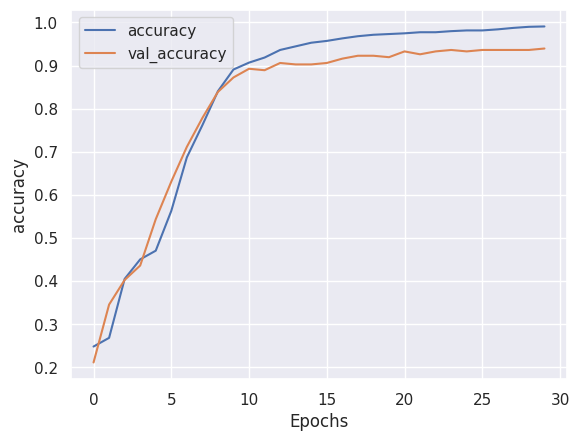

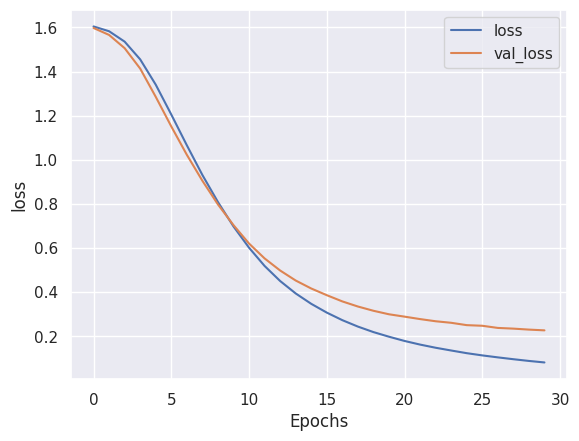

In [66]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")